In [1]:
from math import pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile

from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_distribution

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2, EstimatorV2, QiskitRuntimeService
from qiskit.visualization import plot_histogram

import numpy as np
import matplotlib.pyplot as plt

In [3]:
observables = SparsePauliOp(['XYZ'], [0.5])

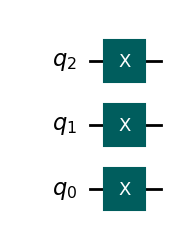

In [4]:
circuit = QuantumCircuit(3)
circuit.x([0,1,2])
circuit.draw()

In [66]:
estimator = EstimatorV2(backend=AerSimulator())
job = estimator.run([(circuit, observables,None, 0.01)])
exp_vals = job.result()[0].data.evs
print(exp_vals)

-0.0087


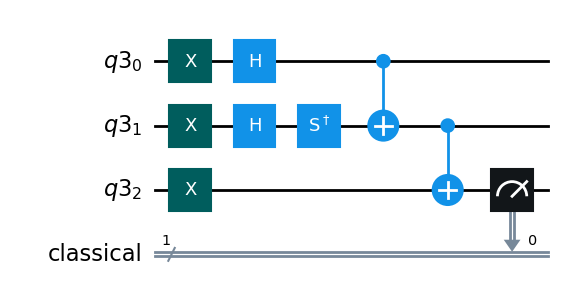

In [77]:
qr = QuantumRegister(3)
cr = ClassicalRegister(1, name='classical')
circuit = QuantumCircuit(qr, cr)

circuit.x([0,1,2])
circuit.h([0,1])
circuit.sdg(1)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(2, cbit=cr)
circuit.draw(reverse_bits=False)

In [168]:
sampler = SamplerV2(backend=AerSimulator())
job = sampler.run([(circuit, None, 500)])
counts = job.result()[0].data.classical.get_counts()
print(counts)
total = sum(counts.values())
print(total)
probabilities = { state: count/total for state, count in counts.items() }
print(probabilities)
exp_vals = probabilities['0'] - probabilities['1']
print(exp_vals)

{'0': 247, '1': 253}
500
{'0': 0.494, '1': 0.506}
-0.01200000000000001
